# Hola Leandro!

Mi nombre es David Bautista, soy code reviewer de Tripleten y hoy tengo el gusto de revisar tu proyecto.

Cuando vea un error la primera vez, lo señalaré. Deberás encontrarlo y arreglarlo. La intención es que te prepares para un espacio real de trabajo. En un trabajo, el líder de tu equipo hará lo mismo. Si no puedes solucionar el error, te daré más información en la próxima ocasión.

Encontrarás mis comentarios más abajo - por favor, no los muevas, no los modifiques ni los borres.

¿Cómo lo voy a hacer? Voy a leer detenidamente cada una de las implementaciones que has llevado a cabo para cumplir con lo solicitado. Verás los comentarios de esta forma:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si todo está perfecto.
</div>


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>


<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
    
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>


Puedes responderme de esta forma: 

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
</div>

¡Empecemos!

# Predicción de salida de clientes del banco Beta Bank con Machine Learning

## Introducción

Los clientes de Beta Bank se están retirando, cada mes poco a poco. Los analistas descubrieron que es más barato mantener a los clientes existentes que atraer nuevos. Utilizando la información recopilada sobre los clientes durante un tiempo, necesitamos predecir si el cliente dejará el banco pronto. Como información base se tienen los datos sobre el comportamiento pasado de los clientes y la terminación de contratos con el banco.

El objetivo es crear un modelo con el máximo valor F1 (media armonica de recall y precisión) posible. Se buscará lograr un valor F1 de al menos 0.59 y verificarlo para el conjunto de prueba. Además, se debe medir la métrica AUC-ROC y compararla con el valor F1.

### Objetivos

- Descargar y preparar los datos. Explicar el procedimiento.
- Examinar el equilibrio de clases. Entrenar el modelo sin tener en cuenta el desequilibrio. Describir brevemente tus hallazgos.
- Mejorarla calidad del modelo. Utilizar al menos dos enfoques para corregir el desequilibrio de clases. Utilizar conjuntos de entrenamiento y validación para encontrar el mejor modelo y el mejor conjunto de parámetros. 
- Entrenar diferentes modelos en los conjuntos de entrenamiento y validación. Encontrar el mejor. Describir brevemente los hallazgos.
- Realizar la prueba final.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo con la introduccíon del proyecto y componentes como la tabla de contenido.
    
</div>

## Inicialización de datos

Lo primero que se realizará sera cargar las librerías necesarias para este proyecto:

In [1]:
# Cargar todas las librerías
from scipy import stats as st
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

#Librerías para machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.utils import shuffle

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo cargando las librerías necesarias para el desarrollo del proyecto. 
</div>

### Cargar datos

In [2]:
# Cargar el archivo de datos en un DataFrame
data=pd.read_csv('/datasets/Churn.csv')

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo cargando los datos, te voy a dar un pequeño consejo de buena práctica. Las buenas prácticas de Python indican que lo ideal a la hora de declarar una variable es óptimo dejar un espacio entre el nombre de la misma, el igual, y el componente de definición, ejemplo:
    
```
data = pd.read_csv('/datasets/churn.csv')

```
</div>

In [3]:
#Imprimiendo una muestra de los datos:
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen detalle el del ``head()``
</div>

### Exploración de datos iniciales

Se procederá a revisar como se encuentran los datos de forma general:

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


De la base de datos obtenida se han identificado las siguientes columnas:

- `RowNumber`: índice de cadena de datos
- `CustomerId`: identificador de cliente único
- `Surname`: apellido
- `CreditScore`: valor de crédito
- `Geography`: país de residencia
- `Gender`: sexo
- `Age`: edad
- `Tenure`: período durante el cual ha madurado el depósito a plazo fijo de un cliente (años)
- `Balance`: saldo de la cuenta
- `NumOfProducts`: número de productos bancarios utilizados por el cliente
- `HasCrCard`: el cliente tiene una tarjeta de crédito (1 - sí; 0 - no)
- `IsActiveMember`: actividad del cliente (1 - sí; 0 - no)
- `EstimatedSalary`: Salario estimado
- `Exited`: El cliente se ha ido (1 - sí; 0 - no). Este es el objetivo de nuestro modelo de predicción


In [5]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


**Observaciones sobre de los datos**

Con una vista general de los datos se ha detectado los siguientes problemas:

- Se observa que en la columna "Tenure" se tienen datos ausentes, ya que cada columna tiene como máximo 10000 datos y esta solo tiene 9091. Se debe analizar el porque de estos datos ausentes.
- Existe una columna denominada "RowNumber" la cual es un identificador de filas, sin embargo, este dato puede que no sea de utilidad ya que el dataframe tiene su propio indice y esta columna puede ocasionar interferencia al momento de realizar modelos de predicción, por lo que se optará por retirarla.  
- Para el modelado tambien se eliminará la columna CustomerId, ya que no es reelevante para la predicción. Se eliminará posterior a verificar que no existan datos repetidos 

Se revisará las variables características en busqueda de datos que tengan errores de tipeo o algun otro problema.

In [6]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [7]:
data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

En esta revisión no se han detectado problemas con las variables características, por lo que vamos a seguir con el proceso de correción

### Correción de datos:

**Revisión de datos ausentes**
Como se indicó anteriormente, se ha encontrado datos ausentes en la columna "Tenure", los cuales se analizarán y se verificará sus posibles razones


In [8]:
data.isna().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [9]:
data.loc[data['Tenure'].isna()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
30,31,15589475,Azikiwe,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,49,15766205,Yin,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,52,15768193,Trevisani,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,54,15702298,Parkhill,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,61,15651280,Hunter,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9944,9945,15703923,Cameron,744,Germany,Male,41,NaN,190409.34,2,1,1,138361.48,0
9956,9957,15707861,Nucci,520,France,Female,46,NaN,85216.61,1,1,0,117369.52,1
9964,9965,15642785,Douglas,479,France,Male,34,NaN,117593.48,2,0,0,113308.29,0
9985,9986,15586914,Nepean,659,France,Male,36,NaN,123841.49,2,1,0,96833.00,0


No se han observado patrones para las filas donde el valor de "Tenure" es NaN. Se analizará la suposición de que estos valores sean NaN, debido a que no se han colocado depositos en plazo fijo, ´por lo que se rellenará de 0s


In [10]:
data['Tenure'].unique()

array([ 2.,  1.,  8.,  7.,  4.,  6.,  3., 10.,  5.,  9.,  0., nan])

In [11]:
data['Tenure']=data['Tenure'].fillna(0)

Ahora vamos a eliminar la columna RowNumber, ya que es solo un indice igual al que ya nos proporciona el dataframe, por lo que no es necesario

In [12]:
data.drop('RowNumber', axis=1, inplace= True)
data

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


### Revisión de datos duplicados

Se revisará en caso de existir datos duplicados. Dado que existe un identificador único por cada cliente, si existen duplicados serán eliminados 

In [13]:
data.duplicated().sum()

0

Se verificará si existe algun cliente con el mismo CustomerId:

In [14]:
data['CustomerId'].duplicated().sum()

0

Con esto se ha terminado la revisión de los datos, y vamos a proceder con la siguiente parte del proyecto que es la preparación de los datos para su entrenamiento con diferentes modelos

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Hola Leandro, muy buen trabajo con la sección de exploración de los datos. Contemplas una gama de aspectos interesantes y coherentes.
</div>

## Preparación de datos

Primero vamos a separar los datos entre las características y el objetivo.  Se retirará las columnas que no aportan información reelevante para los modelos de clasificación. Las columnas que consideramos no se requieren para realizar la clasificación son: CustomerId, Surname. Posteriormente se realizará una codificación OHE para que las variables características tengan codificación numérica.  Esta será nuestra base de datos pre procesada.

Luego se va a dividir los datos en un conjunto de entrenamiento y otro de validación (75-25%). Y esta será nuestra información 


### Preprocesamiento de datos

In [15]:
data_preprocessed=data.drop(['CustomerId', 'Surname'], axis=1) #Retirando las colmnas que pueden generar problemas al momento
#de entrenar modelos
data_preprocessed

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


In [16]:
data_ohe=pd.get_dummies(data_preprocessed, drop_first=True) #Codificación OHE eliminando la primera columna para evitar redundancia
data_ohe

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5.0,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10.0,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7.0,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3.0,75075.31,2,1,0,92888.52,1,1,0,1


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo.
</div>

### División entre datos de entrenamiento y datos de validación

Ahora vamos a dividir los datos en dos conjuntos, un conjunto de entrenamiento con el 75% de los datos y un conjunto de validación con el 25% de los datos:

In [17]:
# Separando 
target = data_ohe['Exited']
features = data_ohe.drop('Exited', axis=1)

features_train, features_valid, target_train, target_valid = train_test_split (
features, target, test_size=0.25, random_state=12345)

### Aplicación de una escala estandar para variables numéricas

Se escogerá las variables numéricas para aplicar un escala estandar.

In [18]:
numeric=['CreditScore', 'Age', 'Tenure','Balance', 'EstimatedSalary'] #Variables numéricas


In [19]:
#Estandarización de los datos:
scaler = StandardScaler()
scaler.fit(features_train[numeric])

pd.options.mode.chained_assignment=None #Para evitar el warning de SettingWithCopyWarning

features_train[numeric]=scaler.transform(features_train[numeric])
features_valid[numeric]=scaler.transform(features_valid[numeric])

pd.options.mode.chained_assignment=None

print(features_train.shape)


(7500, 11)


In [20]:
features_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
226,0.442805,-0.841274,1.426885,-1.224577,2,1,1,-1.269750,0,0,0
7756,-0.310897,-0.270730,0.784858,0.641783,1,1,1,0.960396,0,1,0
2065,-0.259274,-0.556002,1.105871,-1.224577,2,1,0,0.661864,0,0,1
2800,1.217157,1.155631,1.426885,1.290462,2,1,0,-1.039476,0,0,1
7028,0.690598,-1.221637,-1.462240,1.142121,1,0,0,-0.851729,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4478,-1.054275,-0.746183,-0.178184,-1.224577,2,0,1,-1.291837,0,0,1
4094,-1.425964,-0.936365,1.747899,-1.224577,2,0,1,-1.294782,0,0,1
3492,0.040142,0.585087,-1.462240,-0.304909,1,0,1,-0.916678,0,0,0
2177,0.164039,-1.411819,-0.178184,-1.224577,2,0,1,-1.142032,0,0,0


In [21]:
features_valid

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7867,-0.114728,0.680178,-0.499198,-1.224577,1,1,1,0.969342,0,1,0
1402,1.093261,-0.936365,1.105871,0.865861,1,1,0,-0.395081,0,0,1
8606,1.609496,0.299815,0.142830,-1.224577,2,1,1,-0.439560,0,1,1
8885,0.174363,0.585087,-0.178184,0.419555,2,1,1,1.006040,0,1,1
6494,0.494429,-1.031456,0.784858,-1.224577,2,1,1,-1.343789,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
2149,1.908912,1.726176,-0.178184,0.399676,1,1,0,-1.093439,0,1,1
6328,1.433976,0.204724,0.784858,0.532213,1,0,0,-0.233911,0,1,0
3952,-0.589664,-0.460911,0.784858,1.045842,1,0,0,-1.573095,0,0,0
7480,-1.663432,0.109633,0.463844,1.279830,1,0,0,1.569015,0,1,1


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo con la creación de sets para el despliegue de los modelos.
</div>

## Equilibrio de clases

### Análisis del equilibrio de clases

Ahora que ya tenemos a los datos preprocesados y listos para ser entrenados, es necesario observar como se encuentra el equilibrio de clases. vamos a observar como se divide las clases del objetivo que deseamos analizar:

In [22]:
class_frequency=data_ohe['Exited'].value_counts(normalize=True)
class_frequency

0    0.7963
1    0.2037
Name: Exited, dtype: float64

<AxesSubplot:>

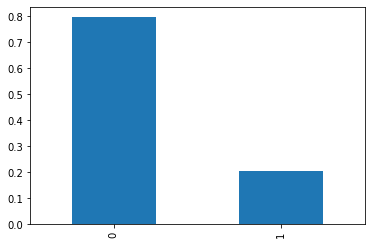

In [23]:
class_frequency.plot(kind='bar')

Con esto se observa que aproximadamente el 80% de los usuarios aun se mantienen como clientes del banco. Ahora vamos a realizar predicciones con tres modelos: Regresión logística, Arbol de decisión y Bosque aleatorio, con el fin de observar como se comportan las predicciones con cada modelo y se los va a comparar con un modelo constante.

**Entrenando un modelo constante**

Se verificará que resultados obtenemos con un modelo constante que va a servir como modelo de comparación

In [24]:
target_pred_constant=pd.Series(0, index=target.index)
print(accuracy_score(target,target_pred_constant))

0.7963


El modelo constante nos da una calificación de 0.7963

**Entrenando con Regresión logística**

Vamos a observar que resultados se obtienen del modelo de regresión logística:

In [25]:
modelRL = LogisticRegression(random_state=12345, solver='liblinear')
modelRL.fit(features_train, target_train)

predicted_valid = modelRL.predict(features_valid) #Utilizando un modelo básico para observar que resultados nos arroja

accuracy_valid=accuracy_score(target_valid, predicted_valid)

print(accuracy_valid)

0.7968


Este modelo da una exactitud de 0.7968, la cual es bastante similar a la división de clases encontrada previamente, y al modelo constante. Vamos a observar como se dividen las clases en la predicción de forma gráfica:

0    0.9268
1    0.0732
dtype: float64


<AxesSubplot:>

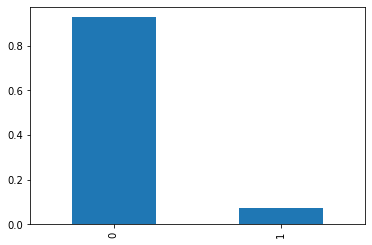

In [26]:
predicted_valid_s=pd.Series(modelRL.predict(features_valid))

class_frequency_model=predicted_valid_s.value_counts(normalize=True)

print(class_frequency_model)

class_frequency_model.plot(kind='bar')

Se observa que est modelo predice como '0' a aproximadamente el 92% de los datos, cuando el objetivo sería que clasifique cerca del 80% de datos, por lo que se observa un desequilibrio de clases. Vamos a observar como se comporta la matriz de confusión para este modeo:

In [27]:
confusion_matrix(target_valid, predicted_valid)

array([[1887,   78],
       [ 430,  105]])

Se observa una gran cantidad de falsos negativos los cuales incluso superan el número de verdaderos positivos y una cantidad considerable de falsos positivos. Ahora se observará como esta el valor de recall y precisión para esta predicción:

In [28]:
recall_score(target_valid, predicted_valid)

0.19626168224299065

In [29]:
precision_score(target_valid, predicted_valid)

0.5737704918032787

Se tiene valores muy malos para estos dos parámetros. Vamos a revisar que sucede con el valor de F1 que combina los valores de recall y precisión

In [30]:
f1_score(target_valid, predicted_valid)

0.29247910863509746

Se obtiene un valor de F1 muy bajo, que contrasta con la exactitud obtenida con la función accuracy_score

**Entrenando con árbol de decisión**

Vamos a analizar que resultados se obtienen con el modelo de arbol de decisión, se utilizará un rango para el parámetro de profundidad para observar con cual da mejores resultados:

In [31]:
best_result = 0
best_depth = 0

for depth in range(1,10):
    modelDT = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    
    modelDT.fit(features_train, target_train)

    predicted_valid = modelDT.predict(features_valid) 

    accuracy_valid=accuracy_score(target_valid, predicted_valid)
    
    if accuracy_valid > best_result:
        best_result = accuracy_valid
        best_depth= depth

print(f'Mejor resultado de exactitud: {best_result}')
print(f'Mejor profundidad para el modelo: {best_depth}')

modelDT = DecisionTreeClassifier(random_state=12345, max_depth=best_depth)
modelDT.fit(features_train, target_train)
predicted_valid = modelDT.predict(features_valid)
accuracy_valid=accuracy_score(target_valid, predicted_valid)
print(f'Valor de exactitud para el modelo escogido: {accuracy_valid}')


Mejor resultado de exactitud: 0.854
Mejor profundidad para el modelo: 6
Valor de exactitud para el modelo escogido: 0.854


Este modelo da una exactitud maxima de 0.854 con una profundidad de 6. Vamos a observar como se dividen las clases en la predicción de forma gráfica:

0    0.8936
1    0.1064
dtype: float64


<AxesSubplot:>

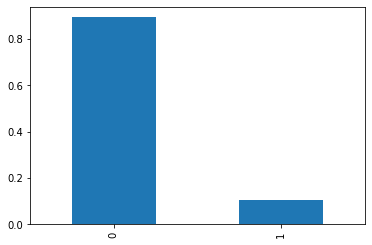

In [32]:
predicted_valid_s=pd.Series(modelDT.predict(features_valid))

class_frequency_model=predicted_valid_s.value_counts(normalize=True)

print(class_frequency_model)

class_frequency_model.plot(kind='bar')

Con este modelo se redujo la cantidad de datos que se clsaificaron como '0', siendo que ahora califica el 89% con esta clase, sin embargo sigue estando muy lejos del 80%. Se analizará la matriz de confusión:

In [33]:
confusion_matrix(target_valid, predicted_valid)

array([[1917,   48],
       [ 317,  218]])

La matriz de confusión que se obtiene con este modelo nos indica que se mejoró la cantidad de verdaderos postiivos respecto al modelo de regresión logística, sin embargo la cantidad de falsos positivos y falsos negativos son muy grandes, en particular los valores de falsos negativos son demasiado altos. Vamos a analizar los valores de precisión y recall

In [34]:
recall_score(target_valid, predicted_valid)

0.4074766355140187

In [35]:
precision_score(target_valid, predicted_valid)

0.8195488721804511

El recall es mucho mejor comparado al obtenido con regresión logística, y la precisión tambien aumentó de forma considerable Vamos a analizar el valor de F1:    

In [36]:
f1_score(target_valid, predicted_valid)

0.5443196004993758

Se ha obtenido un valor mucho mejor de F1 para este modelo, sin embargo aun no es suficientemente bueno para los requerimientos del proyecto

**Entrenando con Bosque aleatorio**

Finalmente se entrenará con el modelo de bosque aleatorio. Vamos a verificar con que valores de estimadores se obtienen los mejores resultados:

In [37]:
best_score = 0
best_est = 0

for est in range (1,30):
    modelRF = RandomForestClassifier(random_state = 12345, n_estimators = est)
    modelRF.fit(features_train, target_train)
    score = modelRF.score(features_valid, target_valid)
    
    if score > best_score:
        best_score = score
        best_est = est
        
print(f'Accuracy del mejor modelo en el conjunto de validación (n_estimators = {best_est}): {best_score}')

modelRF = RandomForestClassifier(random_state = 12345, n_estimators = best_est) # Entrenando con el mejor valor de n_estimators
modelRF.fit(features_train, target_train)
predicted_valid = modelRF.predict(features_valid)
score = modelRF.score(features_valid, target_valid)
print(score)
    

Accuracy del mejor modelo en el conjunto de validación (n_estimators = 17): 0.8512
0.8512


Este modelo da una exactitud maxima de 0.8512 con una cantidad de estimadores igual a 17, la cual es bastante similar al modelo de arbol de decisión. Vamos a observar como se dividen las clases en la predicción de forma gráfica:

0    0.8652
1    0.1348
dtype: float64


<AxesSubplot:>

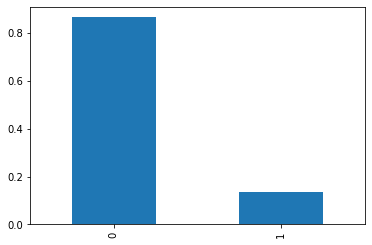

In [38]:
predicted_valid_s=pd.Series(modelRF.predict(features_valid))

class_frequency_model=predicted_valid_s.value_counts(normalize=True)

print(class_frequency_model)

class_frequency_model.plot(kind='bar')

Con este modelo se redujo aun más la cantidad de datos que se clsaificaron como '0', siendo que ahora califica el 86% con esta clase, estos valores están más cerca de lo deseado, pero vamos a analizar la matriz de confusión:

In [39]:
confusion_matrix(target_valid, predicted_valid)

array([[1878,   87],
       [ 285,  250]])

La matriz de confusión que se obtiene con este modelo nos indica que se mejoró la cantidad de verdaderos postivos respecto a los modelos probados previamente, la cantidad de falsos negativos se ha visto reducida, sin embargo la cantidad de falsos positivos aumentaron respecto al modelo de árbol de decision. Vamos a analizar los valores de precisión y recall

In [40]:
recall_score(target_valid, predicted_valid)

0.4672897196261682

In [41]:
precision_score(target_valid, predicted_valid)

0.7418397626112759

Este modelo aumento el valor de recall pero redujo  la precision respecto al arbol de decisión. Se analizará el valor de F1:

In [42]:
f1_score(target_valid, predicted_valid)

0.573394495412844

Con el modelo de bosque aleatorio se ha obtenido un valor de F1 mayor que con los demás modelos, este valor se acerca mucho al solicitado pero aún no cumple con los requerimientos del proyecto.

Se observa que se obtiene niveles de precisión similares que con una predicción constante y esto se debe a que existe un desequilibrio de clases, lo cual afecta a como se entrena el modelo. En este caso la proporcion esta muy lejos de 1:1 entre las dos clases existentes.

### Observaciones sobre el equilibrio de clases

Una vez analizado el equilibrio de clases se tiene las siguientes conclusiones:

- Realizando el análisis con los tres diferentes métodos y modificando los parámetros para obtener los mejores resultados se logró obtener un valor máximo de F1 de  0.5733 con el modelo de bosque aleatorio.
- Se observó tambien las medidas de precisión y recall varían mucho dependiendo del modelo. El modelo de arbol de decisión obtuvo los mejores resultados de precisión y el modelo de bosque aleatorio obtuvo los mejores resultados para recall
- Con estos valores obtenidos ningun modelo logra valores F1 suficientes para el planteamiento del proyecto, por lo cual es necesario solucionar el problema del desequilibrio de clases y ajustar el modelo para maximizar el valor de F1


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo con la sección, esta nos permite adentrarnos de las dificultades que puede conllevar el despliegue de un modelo de clasificación cuando hay un claro desbalance en el target objetivo.
</div>

## Ajuste de peso de clase

### Ajustando class_weight='balanced'

Con el objetivo de evitar el problema del desequilibrio de clases detectado anteriormente se va a buscar formas para ajustar los pesos de cada clase y lograr los valores de F1 más altos posible. Para esto se utilizará los tres modelos probados con los parámetros con los cuales se logró la mejor exactitud en las pruebas anteriores. Vamos a iniciar nuestro análisis del ajuste de peso con un modelo de Regresión Logística cambiando el parámetro de class_weight a 'balanced'.

**Modelo de Regresión Logística**

In [43]:
modelLR=LogisticRegression(random_state=12345, solver='liblinear',class_weight='balanced' )
modelLR.fit(features_train, target_train)
predicted_valid = modelLR.predict(features_valid)

print(f1_score(target_valid, predicted_valid))

0.5077441077441077


Modificando el parámetro de class_weight = 'balanced' se logra una mejora sustancial del valor de F1, que previamente quedó en 0.2924 y ahora tiene un valor de 0.5077

In [44]:
modelDT = DecisionTreeClassifier(random_state=12345, max_depth=best_depth, class_weight='balanced')

modelDT.fit(features_train, target_train)
predicted_valid = modelDT.predict(features_valid)

print(f1_score(target_valid, predicted_valid))

0.5907780979827089


Este cambio causo un incremento del valor de F1 de  0.544 a 0.59

In [45]:
modelRF = RandomForestClassifier(random_state = 12345, n_estimators = best_est, class_weight='balanced')

modelRF.fit(features_train, target_train)
predicted_valid = modelRF.predict(features_valid)

print(f1_score(target_valid, predicted_valid))

0.5552941176470589


Este causo una disminución del valor de F1 de 0.57 a 0.55

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Bien hecho, buen trabajo aplicando la técnica de balanceo de clases directa de los hiperparámetros de los modelos. En últimas esta es la solución más rápida que podemos tener para este tipo de problemas, sin embargo, tal cual como lo vas a mostrar a continuación, también hay unas alternativas interesantes.
</div>

### Utilizando la técnica de sobremuestreo

Con este método podemos hacer que las observaciones de la clase minoritaria sean menos raras. Para esto se utilizará la siguiente sección de código:

In [46]:
# Función para realizar el sobremuestreo

def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_upsampled=pd.concat([features_zeros]+[features_ones]*repeat)
    target_upsampled=pd.concat([target_zeros]+[target_ones]*repeat)
    
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled



**Para el modelo de Regresión Logística**

In [47]:
modelLR=LogisticRegression(random_state=12345, solver='liblinear')
best_rep=0
best_score=0

for rep in range(2,20):
    features_upsampled, target_upsampled=upsample(features_train, target_train, rep)
    modelLR.fit(features_upsampled, target_upsampled)
    predicted_valid=modelLR.predict(features_valid)
    score=f1_score(target_valid, predicted_valid)
    print(f'Valor de F1 con un sobremuestreo de {rep} Repeticiones: {score}')
    if score>best_score:
        best_rep = rep
        best_score=score

print(f'La mejor cantidad de repeticiones para el sobremuestreo son: {best_rep}, y su nivel de calificación es: {best_score}')

Valor de F1 con un sobremuestreo de 2 Repeticiones: 0.46274509803921565
Valor de F1 con un sobremuestreo de 3 Repeticiones: 0.5034856700232379
Valor de F1 con un sobremuestreo de 4 Repeticiones: 0.5074024226110363
Valor de F1 con un sobremuestreo de 5 Repeticiones: 0.4988095238095238
Valor de F1 con un sobremuestreo de 6 Repeticiones: 0.4811783960720132
Valor de F1 con un sobremuestreo de 7 Repeticiones: 0.4660887302396737
Valor de F1 con un sobremuestreo de 8 Repeticiones: 0.4533205004812319
Valor de F1 con un sobremuestreo de 9 Repeticiones: 0.44080145719489977
Valor de F1 con un sobremuestreo de 10 Repeticiones: 0.4302019315188762
Valor de F1 con un sobremuestreo de 11 Repeticiones: 0.4202959830866808
Valor de F1 con un sobremuestreo de 12 Repeticiones: 0.4109926168990976
Valor de F1 con un sobremuestreo de 13 Repeticiones: 0.4032
Valor de F1 con un sobremuestreo de 14 Repeticiones: 0.395776300351975
Valor de F1 con un sobremuestreo de 15 Repeticiones: 0.38973966309341496
Valor de F

**Con el modelo de arbol de decisión**

In [48]:
modelDT = DecisionTreeClassifier(random_state=12345, max_depth=best_depth)

best_rep=0
best_score=0

for rep in range(2,20):
    features_upsampled, target_upsampled=upsample(features_train, target_train, rep)
    modelDT.fit(features_upsampled, target_upsampled)
    predicted_valid=modelDT.predict(features_valid)
    score=f1_score(target_valid, predicted_valid)
    print(f'Valor de F1 con un sobremuestreo de {rep} Repeticiones: {score}')
    if score>best_score:
        best_rep = rep
        best_score=score

print(f'La mejor cantidad de repeticiones para el sobremuestreo son: {best_rep}, y su nivel de calificación es: {best_score}')


Valor de F1 con un sobremuestreo de 2 Repeticiones: 0.5920303605313093
Valor de F1 con un sobremuestreo de 3 Repeticiones: 0.6004382761139518
Valor de F1 con un sobremuestreo de 4 Repeticiones: 0.5919540229885057
Valor de F1 con un sobremuestreo de 5 Repeticiones: 0.6006968641114983
Valor de F1 con un sobremuestreo de 6 Repeticiones: 0.5782975958414555
Valor de F1 con un sobremuestreo de 7 Repeticiones: 0.5429594272076372
Valor de F1 con un sobremuestreo de 8 Repeticiones: 0.535632183908046
Valor de F1 con un sobremuestreo de 9 Repeticiones: 0.4953846153846154
Valor de F1 con un sobremuestreo de 10 Repeticiones: 0.4935864545920985
Valor de F1 con un sobremuestreo de 11 Repeticiones: 0.4920716112531969
Valor de F1 con un sobremuestreo de 12 Repeticiones: 0.4940934771443246
Valor de F1 con un sobremuestreo de 13 Repeticiones: 0.4940934771443246
Valor de F1 con un sobremuestreo de 14 Repeticiones: 0.4784972812654473
Valor de F1 con un sobremuestreo de 15 Repeticiones: 0.45547309833024124


Con el uso de ua técnica de sobremuestreo para el modelo de arbol de decisión se logro un con 5 repeticiones un nivel de F1 de 0.60. Este es un valor muy bueno y que supera el umbral establecido para el proyecto.

**Con modelo de bosque aleatorio**

In [49]:
modelRF = RandomForestClassifier(random_state = 12345, n_estimators = best_est)

best_rep=0
best_score=0

for rep in range(2,20):
    features_upsampled, target_upsampled=upsample(features_train, target_train, rep)
    modelRF.fit(features_upsampled, target_upsampled)
    predicted_valid=modelRF.predict(features_valid)
    score=f1_score(target_valid, predicted_valid)
    print(f'Valor de F1 con un sobremuestreo de {rep} Repeticiones: {score}')
    if score>best_score:
        best_rep = rep
        best_score=score

print(f'La mejor cantidad de repeticiones para el sobremuestreo son: {best_rep}, y su nivel de calificación es: {best_score}')


Valor de F1 con un sobremuestreo de 2 Repeticiones: 0.6014568158168574
Valor de F1 con un sobremuestreo de 3 Repeticiones: 0.5961732124874118
Valor de F1 con un sobremuestreo de 4 Repeticiones: 0.5897693079237714
Valor de F1 con un sobremuestreo de 5 Repeticiones: 0.5875127942681678
Valor de F1 con un sobremuestreo de 6 Repeticiones: 0.5979381443298968
Valor de F1 con un sobremuestreo de 7 Repeticiones: 0.5832492431886983
Valor de F1 con un sobremuestreo de 8 Repeticiones: 0.5975855130784709
Valor de F1 con un sobremuestreo de 9 Repeticiones: 0.5875127942681678
Valor de F1 con un sobremuestreo de 10 Repeticiones: 0.5876288659793815
Valor de F1 con un sobremuestreo de 11 Repeticiones: 0.6030769230769231
Valor de F1 con un sobremuestreo de 12 Repeticiones: 0.5965270684371808
Valor de F1 con un sobremuestreo de 13 Repeticiones: 0.5896656534954408
Valor de F1 con un sobremuestreo de 14 Repeticiones: 0.5798575788402849
Valor de F1 con un sobremuestreo de 15 Repeticiones: 0.6028225806451614


Con este método se logra un valor de F1 igual a 0.6030 utlizando 11 repeticiones para el sobremuestreo, lo cual es un valor muy bueno y supera el umbral establecido

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo, muy buen despliegue de los modelos, aplicando el concepto de sobremuestreo.
</div>

### Utilizando la técnica de submuestreo

Mediante esta técnica vamos a tomar solo una parte de los datos que contienen el valor de 'Exited' en 0, y vamos a observar que sucede con el modelo

In [50]:
#Función para el submuestreo

def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)]
        + [features_ones]
    )
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)]
        + [target_ones]
    )
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345
    )
       
    
    return features_downsampled, target_downsampled


**Para el método de Regresión Lineal**

In [51]:
modelLR=LogisticRegression(random_state=12345, solver='liblinear')
best_frac=0
best_score=0

for frac in np.arange(0.1, 1.1, 0.1):
    features_downsampled, target_downsampled=downsample(features_train, target_train, frac)
    modelLR.fit(features_downsampled, target_downsampled)
    predicted_valid=modelLR.predict(features_valid)
    score=f1_score(target_valid, predicted_valid)
    print(f'Valor de F1 con un submuestreo de {frac} es: {score}')
    if score>best_score:
        best_frac = frac
        best_score=score

print(f'La mejor fracción para el submuestreo es {best_frac}, y su nivel de calificación es: {best_score}')


Valor de F1 con un submuestreo de 0.1 es: 0.42656112576956906
Valor de F1 con un submuestreo de 0.2 es: 0.49287410926365793
Valor de F1 con un submuestreo de 0.30000000000000004 es: 0.5065693430656935
Valor de F1 con un submuestreo de 0.4 es: 0.49786142001710865
Valor de F1 con un submuestreo de 0.5 es: 0.4615384615384615
Valor de F1 con un submuestreo de 0.6 es: 0.42701525054466233
Valor de F1 con un submuestreo de 0.7000000000000001 es: 0.39243498817966904
Valor de F1 con un submuestreo de 0.8 es: 0.3622828784119107
Valor de F1 con un submuestreo de 0.9 es: 0.3363994743758213
Valor de F1 con un submuestreo de 1.0 es: 0.29247910863509746
La mejor fracción para el submuestreo es 0.30000000000000004, y su nivel de calificación es: 0.5065693430656935


Con el uso de una técnica de susbmuestreo y el modelo de regresión lineal se ha obtenido una calificación de F1 = 0.5065 y una fracción de 0.3, con esto no se logró el valor de F1 mínimo requerido

**Para el método de Arbol de decisión**

In [52]:
modelDT = DecisionTreeClassifier(random_state=12345, max_depth=best_depth)

best_frac=0
best_score=0


for frac in np.arange(0.1, 1.1, 0.1):
    features_downsampled, target_downsampled=downsample(features_train, target_train, frac)
    modelDT.fit(features_downsampled, target_downsampled)
    predicted_valid=modelDT.predict(features_valid)
    score=f1_score(target_valid, predicted_valid)
    print(f'Valor de F1 con un submuestreo de {frac} es: {score}')
    if score>best_score:
        best_frac = frac
        best_score=score

print(f'La mejor fracción para el submuestreo es {best_frac}, y su nivel de calificación es: {best_score}')

Valor de F1 con un submuestreo de 0.1 es: 0.4942767950052029
Valor de F1 con un submuestreo de 0.2 es: 0.5895196506550219
Valor de F1 con un submuestreo de 0.30000000000000004 es: 0.5990639625585024
Valor de F1 con un submuestreo de 0.4 es: 0.617002629272568
Valor de F1 con un submuestreo de 0.5 es: 0.591658583899127
Valor de F1 con un submuestreo de 0.6 es: 0.6223091976516635
Valor de F1 con un submuestreo de 0.7000000000000001 es: 0.5704057279236276
Valor de F1 con un submuestreo de 0.8 es: 0.5669481302774427
Valor de F1 con un submuestreo de 0.9 es: 0.5602923264311814
Valor de F1 con un submuestreo de 1.0 es: 0.5443196004993758
La mejor fracción para el submuestreo es 0.6, y su nivel de calificación es: 0.6223091976516635


Para el modelo de arbol de decisión se logró un un valor de F1 de 0.6223 con una fracción de submuestreo de 0.6, lo cual supera al umbral solicitado

**Para el método de bosque aleatorio**

In [53]:
modelRF = RandomForestClassifier(random_state = 12345, n_estimators = best_est)

best_frac=0
best_score=0

for frac in np.arange(0.1, 1.1, 0.1):
    features_downsampled, target_downsampled=downsample(features_train, target_train, frac)
    modelRF.fit(features_downsampled, target_downsampled)
    predicted_valid=modelRF.predict(features_valid)
    score=f1_score(target_valid, predicted_valid)
    print(f'Valor de F1 con un submuestreo de {frac} es: {score}')
    if score>best_score:
        best_frac = frac
        best_score=score

print(f'La mejor fracción para el submuestreo es {best_frac}, y su nivel de calificación es: {best_score}')

Valor de F1 con un submuestreo de 0.1 es: 0.49112125824454594
Valor de F1 con un submuestreo de 0.2 es: 0.5633245382585752
Valor de F1 con un submuestreo de 0.30000000000000004 es: 0.6041506533435819
Valor de F1 con un submuestreo de 0.4 es: 0.6032285471537808
Valor de F1 con un submuestreo de 0.5 es: 0.611214953271028
Valor de F1 con un submuestreo de 0.6 es: 0.6029556650246305
Valor de F1 con un submuestreo de 0.7000000000000001 es: 0.5925925925925927
Valor de F1 con un submuestreo de 0.8 es: 0.5846153846153846
Valor de F1 con un submuestreo de 0.9 es: 0.5771365149833518
Valor de F1 con un submuestreo de 1.0 es: 0.5545454545454546
La mejor fracción para el submuestreo es 0.5, y su nivel de calificación es: 0.611214953271028


Utilizando el método de bosque aleatorio se obtuvo una calificación de F1 = 0.6112 , con una fracción de 0.5, lo cual tambien supera el valor objetivo


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo, muy buen despliegue de los modelos, aplicando el concepto de submuestreo.
</div>

**Observaciones sobre el ajuste de peso de clase realizado**
- Se realizó un ajuste de peso de clase utilizando tres métodos diferentes: Ajustando class_weight a 'balanced', utilizando la técnica de sobremuestreo y utilizando técnica de submuestreo. Con los tres métodos se observa que el modelo de Regresión Logística es el que peor resultados genera. Ninguno de los métodos logró llegar al valor mínimo de F1 solicitado.
- Las técnicas que mejores resultados obtienen con los ajustes de peso con respecto a F1 son el arbol de decisión y el bosque aleatorio, los cuales superan el límite planteado por el proyecto
- Utilizando el ajuste de clase con la opción: class_weight = 'balanced' se logran los mejores valores de F1 para el modelo de arbol de decisión, el cual logra un valor de F1 de 0.59. Los otros dos modelos tambien mejoran su valor de F1 pero no superan el límite establecido para el proyecto.
- Con la técnica de sobremuestreo se obtiene que los métodos de arbol de decisión y bosque aleatorio se obtienen valores de F1 muy similares, de aproximadamente 0.60, mientras que para regresión lineal se logra un valor máximo de 0.50, lo cual no es suficiente para el objetivo planteado.
- Aplicando un submuestreo se logró para la regresión lineal un valor de F1=0.50, los métodos de arbol de decisión y bosque aleatorio se logró valores de 0.62 y 0.61 respectivamente.
- Las técnicas de submuestreo y sobremuestreo generan valores de F1 muy similares para los modelos porbados, sin embargo el submuestreo fue obtuvo resultados ligeramente mejores que el sobremuestreo, por lo que se utilizará esta técnica para los entrenamientos.


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Excelente trabajo, generas conclusiones muy coherentes e interesantes.
</div>

## Escogiendo los mejores modelos para el entrenamiento

Despues de haber revisado varias técnicas para corregir el desequilibrio de clases se aplicara las técnicas combindas para cada modelo con el fin de obtener el valor de F1 más alto posible. Para esto se aplicaran los modelos de entrenamiento de la siguiente forma:

- Para el modelo entrenado con regresión lineal se aplicará el parámetro class_weight='balanced' y un submuestreo con fraccion de 0.3
- Para el modelo entrenado con árbol de decisión se aplicará el parámetro class_weight='balanced', una profundidad (max_depth) de 6 y un submuestreo con fracción de 0.6, se realizará dos pruebas, con el parametro class_weight='balanced' y otro sin este parámetro para verificari si se afecta en algo el valor de F1 con este parámetro
- Para el modelo entrenado con bosquea aleatorio se aplicará una cantidad de estimadores = 17, tambien se realizará dos pruebas, con el parametro class_weight='balanced' y otro sin este parámetro dado que colocar este parámetro disminuia el valor de F1 y se aplicará un submuestreo con fracción de 0.5

**Modelo de regresión lineal con los mejores parámetros:**

In [54]:
modelLRfinal=LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
best_frac=0.3
features_downsampled, target_downsampled=downsample(features_train, target_train, best_frac)
modelLRfinal.fit(features_downsampled, target_downsampled)
predicted_valid=modelLRfinal.predict(features_valid)
scoreLRfinal=f1_score(target_valid, predicted_valid)
print(f'Valor de F1 es: {scoreLRfinal}')


Valor de F1 es: 0.5069860279441119


**Modelo de arbol de decisión con los mejores parámetros**

In [55]:
#Usando class_weight='balanced'
modelDTfinal = DecisionTreeClassifier(random_state=12345, max_depth=best_depth,  class_weight='balanced')
best_frac=0.6
features_downsampled, target_downsampled=downsample(features_train, target_train, 0.6)
modelDTfinal.fit(features_downsampled, target_downsampled)
predicted_valid=modelDTfinal.predict(features_valid)
scoreDTfinal=f1_score(target_valid, predicted_valid)
print(f'Valor de F1 \'balanced\' es: {scoreDTfinal}')

#Sin usar class_weight='balanced'
modelDTfinal = DecisionTreeClassifier(random_state=12345, max_depth=best_depth)
best_frac=0.6
features_downsampled, target_downsampled=downsample(features_train, target_train, 0.6)
modelDTfinal.fit(features_downsampled, target_downsampled)
predicted_valid=modelDTfinal.predict(features_valid)
scoreDTfinal=f1_score(target_valid, predicted_valid)
print(f'Valor de F1 sin \'balanced\'es: {scoreDTfinal}')


Valor de F1 'balanced' es: 0.6144393241167435
Valor de F1 sin 'balanced'es: 0.6223091976516635


**Modelo de bosque aleatorio con los mejores parametros**

In [56]:
#Usando class_weight= 'balanced'
modelRFfinal = RandomForestClassifier(random_state = 12345, n_estimators = best_est, class_weight='balanced')

features_downsampled, target_downsampled=downsample(features_train, target_train, 0.5)
modelRFfinal.fit(features_downsampled, target_downsampled)
predicted_valid=modelRFfinal.predict(features_valid)
scoreRFfinal=f1_score(target_valid, predicted_valid)
print(f'Valor de F1 con \'balanced\' es: {scoreRFfinal}')

#Sin usar class_weight= 'balanced'
modelRFfinal = RandomForestClassifier(random_state = 12345, n_estimators = best_est)

features_downsampled, target_downsampled=downsample(features_train, target_train, 0.5)
modelRFfinal.fit(features_downsampled, target_downsampled)
predicted_valid=modelRFfinal.predict(features_valid)
scoreRFfinal=f1_score(target_valid, predicted_valid)
print(f'Valor de F1 sin \'balanced\' es: {scoreRFfinal}')




Valor de F1 con 'balanced' es: 0.5906542056074766
Valor de F1 sin 'balanced' es: 0.611214953271028


**Tabla resumen de los datos encontrados**
En la tabla a continuación se resumirá los valores encontrados de F1 despues de utilizar diferentes configuraciones de los parámetros:

| Modelo | F1 sin modificar parámetros | F1 class_weight='balanced' | F1 con Sobremuestreo | F1 con Submuestreo | F1 combinando tecnicas|
|-----------|-----------|-----------|-----------|-----------|------------|
| Regresión Logística| 0.2924| 0.5077| 0.5074 | 0.5065 | 0.569
| Arbol de decisión| 0.5443| 0.5907| 0.6006 | 0.6223 | 0.6144
| Bosque Aleatorio| 0.5733| 0.5552| 0.6032 | 0.6112 | 0.5906



**Observaciones**

- Se intentó aplicar dos técnicas para solucionar el desequilibrio de clases en los modelos estudiados pero se observa que para el arbol de decisión y pára el bosque aleatorio los valores de F1 se reducen al ser utilizado el parámetro de weigth_class='balanced'
- A pesar de lo mencionado en el punto anterior, los métodos de arbol de decisión y bosque aleatorio cumplen con el objetivo de superar un valor de f1 de mínimo 0.59, siendo que el mejor es el modelo de arbol de decisión.

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
~~Realmente muy buen trabajo, mi única observación en esta sección es que aportaría mucho para el lector poder visualizar una tabla donde se comparen los resultados de estos modelos.~~</div>

<div class="alert alert-block alert-info">
<b>Se añadió una tabla de comparación de los valores de F1 obtenidos</b> <a class="tocSkip"></a>
</div>


<div class="alert alert-block alert-success">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>
    
Luce genial la tabla. Buen trabajo.</div>

## Ajuste de umbral

Una vez analizados los modelos con los parámetros que dan los mejores valores de f1 vamos a analizar que sucede con el ajuste de umbral y tambien se analizará de forma gráfica mediante el uso 

In [57]:
modelLRfinal.fit(features_train, target_train)
probabilities_valid_LR=modelLR.predict_proba(features_valid)
probabilities_one_valid_LR = probabilities_valid_LR[:,1]

for threshold in np.arange(0, 1.0 , 0.02):
    predicted_valid_LR = probabilities_one_valid_LR > threshold
    precision_LR = precision_score(target_valid, predicted_valid_LR)
    recall_LR = recall_score(target_valid, predicted_valid_LR)
    
    print('Threshold = {:.2f} | Precision = {:.3f}, Recall = {:.3f}'.format(threshold, precision_LR, recall_LR))
    


Threshold = 0.00 | Precision = 0.214, Recall = 1.000
Threshold = 0.02 | Precision = 0.215, Recall = 1.000
Threshold = 0.04 | Precision = 0.226, Recall = 0.981
Threshold = 0.06 | Precision = 0.244, Recall = 0.955
Threshold = 0.08 | Precision = 0.263, Recall = 0.931
Threshold = 0.10 | Precision = 0.283, Recall = 0.895
Threshold = 0.12 | Precision = 0.305, Recall = 0.856
Threshold = 0.14 | Precision = 0.328, Recall = 0.821
Threshold = 0.16 | Precision = 0.347, Recall = 0.779
Threshold = 0.18 | Precision = 0.368, Recall = 0.750
Threshold = 0.20 | Precision = 0.387, Recall = 0.707
Threshold = 0.22 | Precision = 0.407, Recall = 0.667
Threshold = 0.24 | Precision = 0.421, Recall = 0.636
Threshold = 0.26 | Precision = 0.435, Recall = 0.602
Threshold = 0.28 | Precision = 0.448, Recall = 0.550
Threshold = 0.30 | Precision = 0.467, Recall = 0.508
Threshold = 0.32 | Precision = 0.479, Recall = 0.465
Threshold = 0.34 | Precision = 0.492, Recall = 0.434
Threshold = 0.36 | Precision = 0.506, Recall =

/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined a

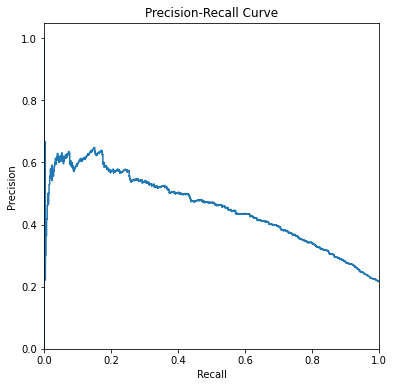

In [58]:
precision_c, recall_c, thresholds = precision_recall_curve(target_valid, probabilities_valid_LR[:,1])

plt.figure(figsize=(6, 6))
plt.step(recall_c, precision_c, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.show() 

In [59]:
modelDTfinal = DecisionTreeClassifier(random_state=12345, max_depth=best_depth)

modelDTfinal.fit(features_train, target_train)
probabilities_valid_DT=modelDTfinal.predict_proba(features_valid)
probabilities_one_valid_DT = probabilities_valid_DT[:,1]

for threshold in np.arange(0, 1.0 , 0.02):
    predicted_valid_DT = probabilities_one_valid_DT > threshold
    precision_DT = precision_score(target_valid, predicted_valid_DT)
    recall_DT = recall_score(target_valid, predicted_valid_DT)
    
    print('Threshold = {:.2f} | Precision = {:.3f}, Recall = {:.3f}'.format(threshold, precision_DT, recall_DT))
    


Threshold = 0.00 | Precision = 0.214, Recall = 0.996
Threshold = 0.02 | Precision = 0.254, Recall = 0.978
Threshold = 0.04 | Precision = 0.254, Recall = 0.978
Threshold = 0.06 | Precision = 0.309, Recall = 0.935
Threshold = 0.08 | Precision = 0.311, Recall = 0.921
Threshold = 0.10 | Precision = 0.405, Recall = 0.837
Threshold = 0.12 | Precision = 0.452, Recall = 0.813
Threshold = 0.14 | Precision = 0.461, Recall = 0.804
Threshold = 0.16 | Precision = 0.483, Recall = 0.781
Threshold = 0.18 | Precision = 0.483, Recall = 0.781
Threshold = 0.20 | Precision = 0.483, Recall = 0.781
Threshold = 0.22 | Precision = 0.483, Recall = 0.781
Threshold = 0.24 | Precision = 0.533, Recall = 0.720
Threshold = 0.26 | Precision = 0.537, Recall = 0.720
Threshold = 0.28 | Precision = 0.556, Recall = 0.705
Threshold = 0.30 | Precision = 0.565, Recall = 0.677
Threshold = 0.32 | Precision = 0.615, Recall = 0.583
Threshold = 0.34 | Precision = 0.619, Recall = 0.579
Threshold = 0.36 | Precision = 0.748, Recall =

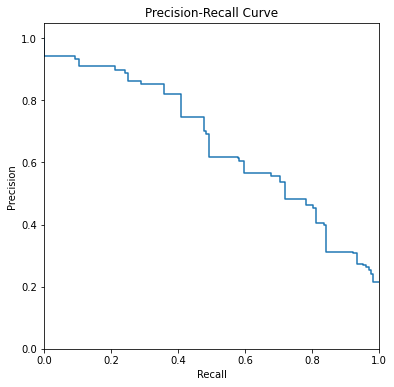

In [60]:
precision_c, recall_c, thresholds = precision_recall_curve(target_valid, probabilities_valid_DT[:,1])

plt.figure(figsize=(6, 6))
plt.step(recall_c, precision_c, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.show() 

In [61]:
modelRFfinal = RandomForestClassifier(random_state = 12345, n_estimators = best_est)

modelRFfinal.fit(features_train, target_train)
probabilities_valid_RF=modelRFfinal.predict_proba(features_valid)
probabilities_one_valid_RF = probabilities_valid_RF[:,1]

for threshold in np.arange(0, 1.0 , 0.02):
    predicted_valid_RF = probabilities_one_valid_RF > threshold
    precision_RF = precision_score(target_valid, predicted_valid_RF)
    recall_RF = recall_score(target_valid, predicted_valid_RF)
    
    print('Threshold = {:.2f} | Precision = {:.3f}, Recall = {:.3f}'.format(threshold, precision_RF, recall_RF))
    

Threshold = 0.00 | Precision = 0.268, Recall = 0.936
Threshold = 0.02 | Precision = 0.268, Recall = 0.936
Threshold = 0.04 | Precision = 0.268, Recall = 0.936
Threshold = 0.06 | Precision = 0.338, Recall = 0.895
Threshold = 0.08 | Precision = 0.338, Recall = 0.895
Threshold = 0.10 | Precision = 0.338, Recall = 0.895
Threshold = 0.12 | Precision = 0.402, Recall = 0.834
Threshold = 0.14 | Precision = 0.402, Recall = 0.834
Threshold = 0.16 | Precision = 0.402, Recall = 0.834
Threshold = 0.18 | Precision = 0.454, Recall = 0.768
Threshold = 0.20 | Precision = 0.454, Recall = 0.768
Threshold = 0.22 | Precision = 0.454, Recall = 0.768
Threshold = 0.24 | Precision = 0.521, Recall = 0.699
Threshold = 0.26 | Precision = 0.521, Recall = 0.699
Threshold = 0.28 | Precision = 0.521, Recall = 0.699
Threshold = 0.30 | Precision = 0.580, Recall = 0.626
Threshold = 0.32 | Precision = 0.580, Recall = 0.626
Threshold = 0.34 | Precision = 0.580, Recall = 0.626
Threshold = 0.36 | Precision = 0.654, Recall =

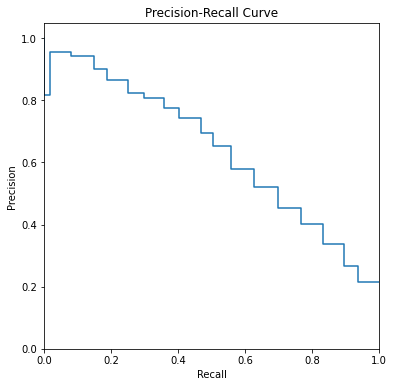

In [62]:
precision_c, recall_c, thresholds = precision_recall_curve(target_valid, probabilities_valid_RF[:,1])

plt.figure(figsize=(6, 6))
plt.step(recall_c, precision_c, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.show() 

Observaciones sobre los ajustes de umbral:
- Se observa que para el modelo de Regresión lineal la curva de precision vs recall crece hasta cierto nivel, para luego decaer poco a poco 
- Las curvas para los modelos de arbol de decisión y bosque aleatorio son muy similares, y se observa que tiene un nivel de altura suficientemente bueno para el objetivo del proyecto

## Revision de la curva ROC
Ahora se analizará la curva de ROC para evaluar como se comportan los modelos 

In [63]:
def roc_curve_func(target_valid_f, probabilities_one_valid_f):
    fpr, tpr, thresholds = roc_curve(target_valid_f, probabilities_one_valid_f)

    plt.figure()
    plt.plot(fpr, tpr)

    # Curva ROC para modelo aleatorio 
    plt.plot([0, 1], [0, 1], linestyle='--')

    # < utiliza las funciones plt.xlim() y plt.ylim() para
    #   establecer el límite para los ejes de 0 a 1 >

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    # < utiliza las funciones plt.xlabel() y plt.ylabel() para
    #   nombrar los ejes "Tasa de falsos positivos" y "Tasa de verdaderos positivos">
    plt.xlabel('Tasa de falsos positivos')
    plt.ylabel('Tasa de verdaderos positivos')

    # < agrega el encabezado "Curva ROC" con la función plt.title() >
    plt.title('Curva ROC')


    plt.show()

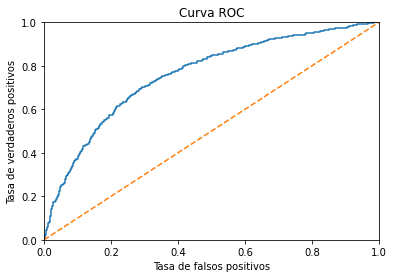

In [64]:
roc_curve_func(target_valid, probabilities_one_valid_LR)

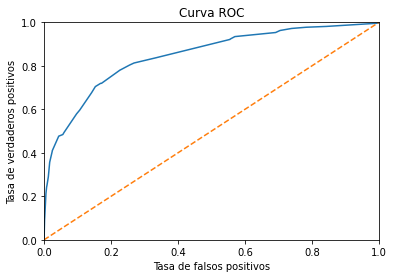

In [65]:
roc_curve_func(target_valid, probabilities_one_valid_DT)

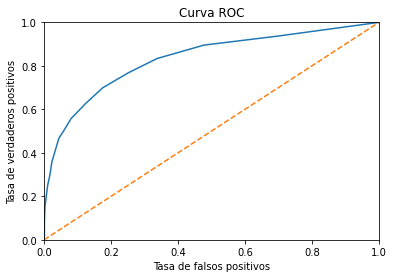

In [66]:
roc_curve_func(target_valid, probabilities_one_valid_RF)

In [67]:
auc_roc=roc_auc_score(target_valid, probabilities_one_valid_LR)
auc_roc

0.7586540153622982

In [68]:
auc_roc=roc_auc_score(target_valid, probabilities_one_valid_DT)
auc_roc

0.8463808232860098

In [69]:
auc_roc=roc_auc_score(target_valid, probabilities_one_valid_RF)
auc_roc

0.8327963663170912

**Observaciones sobre la curva de ROC:**
- El modelo que logra el mejor valor de AUC-ROC es el de arbol de decisión, mientras que el modelo que peor valor de AUC-ROC logra es el de regresión logística.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo, realmente que te felicito por el nivel de código, conclusiones y despliegue de proyecto que gas generado en cada una de las secciones.</div>

## Conclusiones
Una vez realizado el análisis de la base de datos entregada y aplicar a estos datos modelos de para predicción, se ha obtenido las siguientes conclusiones:

- A los datos obtenidos inicialmente no se les detectaron problemas de datos repetidos o con errores de tipeo, por lo que no se requirió de muchas modificaciones aparte de rellenar datos ausentes en la columna Tenure
- Se eliminaron columnas de la base de datos que no iban a aportar al modelo de predicción como: CustomerId, Surname y RowNumber.
- Se realizó una codificación OHE para los datos categóricos y se aplico una escala estandar para las variables categoricas para normalizar los datos y que todos sean numéricos
- Se realizó un análisis del equilibrio de clases y se detectó que de forma genera los datos tienden a tener el valor de 0 en 'Exited' en aproximadamente el 80% de los casos, por lo que realizar predicciones sin tener en cuenta esto nos iba a dar que un modelo constante tenga una efectividad del 80%, siendo que se debía tratar este problema.
- El modelo de regresión logística, utilizando los parámetros básicos dio un valor precisión y recall muy bajo, por lo tanto el valor de F1 tambien fue muy bajo. Este modelo mejoró aplicando un ajuste de peso con el parámetro class_weight = 'balanced', con lo que se logró una mejora sustancial, pero que no llegó a los niveles necesarios. Se aplicó tecnicas de submuestreo y sobre muestreo pero no se logró niveles mejores de F1. Este es el podelo que dio los peores resultados para F1.
- El modelo de Arbol de decisión, sin modificar algun parámetro logra valores de precision y recall decentes, siendo que la precisión es alta, pero el recall es de aproximadamente 0.40. Se logró un valor de F1 de 0.54 pero era insuficiente para los objetivos del proyecto. Primero se intento mejorar ajustando el parámetro de class_weight='balanced' y el valor de F1 mejoró hasta 0.59, con lo cual ya se logró superar el umbral establecido. Con el fin de buscar un resultado mejor se utilizó técnicas de submuestreo y sobremuestreo y se logró el mejor valor de F1 con un submuestreo de fracción 0.6. El valor de F1 máximo alcanzado fue de 0.622, siendo este el mejor valor logrado entre los tres modelos estudiados.
- Con el modelo de Bosque Aleatorio, con los parámetros predeterminados se logró valores de precisión y recall decetes, al igual que con el arbol de decisión, solo que se logró un nivel de recall un poco mejor, pero decayó el nivel de precisión. Este modelo no logró el valor de F1 requerido. Modificando el parámetro de class_weight='balanced' se disminuyó el valor de F1, por lo que para este método no es óptimo mover este parámetro. Utilizando técnicas de sobremuestreo y submuestreo se logro mejorar el valor de F1, superando los 0.6 puntos. El mejor valor que se logró fue de 0.612 utilizando la técnica de submuestreo.
- Para los modelos de árbol de decisión y bosque aleatorio se decidió no modificar el parámetro de class_weight dado que al utilizar la opción 'balanced' los valores de F1 disminuían. Para el modelo de Regresión logística impactaba mucho aplicar esta opción dado que mejoraba sustancialmente el valor de F1.
- Se realió un análisis tambien de los modelos realizando ajuste de umbral y graficando la curva de Precisión vs Recall, donde se observó que para el modelo de regresión logística se tenía una curva que daba un pico en aproximadamente 0.62 de precisión y en 0.2 de recall, despues del cual iba decayendo.
- Para los modelos de árbol de decisión y bosque aleatorio la curva se comportaba de manera diferente, sin mostrar ningun pico y decayendo la precisión conforme aumentaba el recall.
- Se analizó las curvas ROC de los tres modelos y se observó que los modelos de Arbol de decisión y Bosque aleatorio era los que mejores resultados obtenían, sin embargo ninguno de los tres logró un valor cercano a 1 de auc_roc, siendo que el modelo de árbol de decisión fue el mejor dando un valor de 0.84.


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Hola Leandro, reitero mis felicitaciones por el desarrollo general el proyecto, todo eso te llevo a poder plantear unas conclusiones estructuradas de muy buena manera y muy interesantes.</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
# Comentario General

~~Hola Leandro, deje un comentario en amarillo con una idea que se me ocurrió, luciría genial en tu proyecto; sin embargo, todo está muy bien desarrollo. Buen trabajo.~~</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
# Comentario General #2

Hola Leandro, te felicito por el gran proyecto que acabas de desarrollar. Buen trabajo. </div>